In [1]:
title = "ogs@jupyter-lab: AREHS: Salt M Process"
variables = ['displacement','epsilon']
variable = "displacement"
coordinate = "x"

**ogs@jupyter-lab: AREHS: Salt H Process**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-workflows.png" alt="drawing" width="300"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [2]:
from ogs6py import ogs
#run ogs
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="saltz_dom_M_initial_state.prj")
model.run_model(path="/home/ok/ogs/build/release/bin/",LOGFILE="example.log")

>>> run ogs <<<
OGS finished with project file saltz_dom_M_initial_state.prj.
Execution took 1.8730380535125732 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
saltz_dom_initial_state.pvd


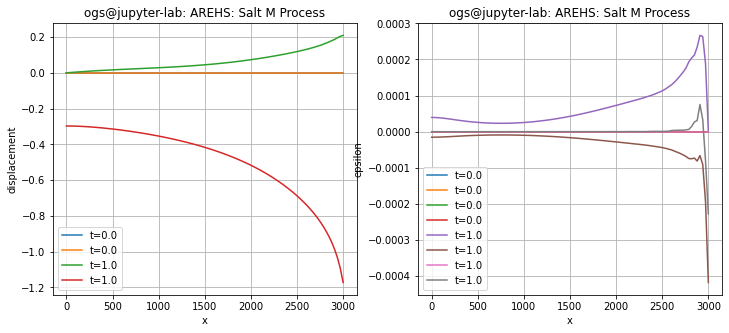

In [3]:
# to read and process (point interpolation) vtu- and pvd-files 
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("saltz_dom_initial_state.pvd", dim=2)
# define xaxis
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=3000., num=100)]
x = np.array(xaxis)[:,0]
# define timestep
time = [0.,1.]
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
# read and interpolate from vtu-files listed in pvd
for t in time:
    xaxis_t = pvdfile.read_point_set_data(t, 'displacement', pointsetarray=xaxis)
    ax[0].plot(x, xaxis_t, label='t='+str(t))
    xaxis_t = pvdfile.read_point_set_data(t, 'epsilon', pointsetarray=xaxis)
    ax[1].plot(x, xaxis_t, label='t='+str(t))
# plot formatting
ax[0].set_title(title)
ax[0].set_xlabel(coordinate)
ax[0].set_ylabel(variables[0])
ax[0].legend()
ax[0].grid()
ax[1].set_title(title)
ax[1].set_xlabel(coordinate)
ax[1].set_ylabel(variables[1])
ax[1].legend()
ax[1].grid()
plt.savefig("plot.png")
plt.show()

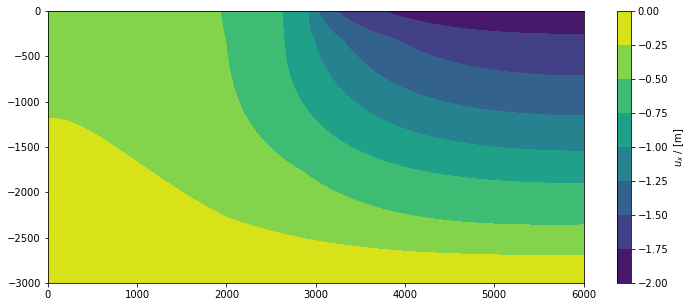

In [4]:
m_plot=vtuIO.VTUIO("saltz_dom_initial_state_ts_1_t_1.000000.vtu", dim=2)
triang=tri.Triangulation(m_plot.points[:,0],m_plot.points[:,1])
ux_plot = m_plot.get_point_field("displacement").T[1]
fig, ax = plt.subplots(figsize=(12,5))
contour_left = ax.tricontourf(triang, ux_plot)
fig.colorbar(contour_left,label='$u_x$ / [m]')

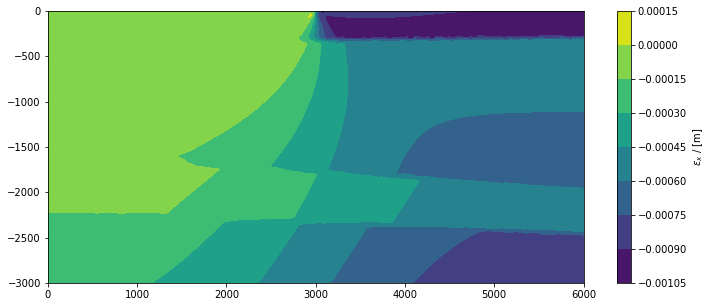

In [5]:
ux_plot = m_plot.get_point_field("epsilon").T[1]
fig, ax = plt.subplots(figsize=(12,5))
contour_left = ax.tricontourf(triang, ux_plot)
fig.colorbar(contour_left,label='$\epsilon_x$ / [m]')

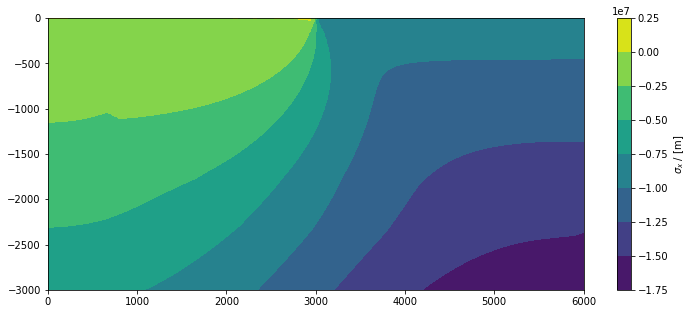

In [6]:
ux_plot = m_plot.get_point_field("sigma").T[1]
fig, ax = plt.subplots(figsize=(12,5))
contour_left = ax.tricontourf(triang, ux_plot)
fig.colorbar(contour_left,label='$\sigma_x$ / [m]')

In [7]:
import time
print(time.ctime())

Thu Jun 10 01:33:28 2021


**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: https://www.overleaf.com/project/601cf751130d22dd456ccd9a
- project file: salt_dom_liquid_flow.prj
- notebook compilation by OK (https://github.com/OlafKolditz/ogs-jupyter-lab)

**Credits**
- Wenqing Wang for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (JOSS review pending) https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc
